In [285]:
import zipfile
zip = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Alzimers DataSet.zip")
zip.extractall()
zip.close()

In [286]:
!pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [287]:
import splitfolders
splitfolders.ratio('Dataset', output="output", seed=1345, ratio=(.7, 0.2,0.1)) 

Copying files: 6400 files [00:01, 5292.24 files/s]


In [288]:
import os

In [289]:
for dirpath, dirnames, filenames in os.walk("output"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 3 directories and 0 images in output
There are 4 directories and 0 images in output/train
There are 0 directories and 2240 images in output/train/Non_Demented
There are 0 directories and 627 images in output/train/Mild_Demented
There are 0 directories and 44 images in output/train/Moderate_Demented
There are 0 directories and 1568 images in output/train/Very_Mild_Demented
There are 4 directories and 0 images in output/test
There are 0 directories and 320 images in output/test/Non_Demented
There are 0 directories and 90 images in output/test/Mild_Demented
There are 0 directories and 8 images in output/test/Moderate_Demented
There are 0 directories and 224 images in output/test/Very_Mild_Demented
There are 4 directories and 0 images in output/val
There are 0 directories and 640 images in output/val/Non_Demented
There are 0 directories and 179 images in output/val/Mild_Demented
There are 0 directories and 12 images in output/val/Moderate_Demented
There are 0 directories and 448 

In [290]:
import pathlib
import numpy as np

In [291]:
# dir_path = pathlib.Path("Dataset")
# class_names = np.array([i.name for i in dir_path.glob("*")])
# print(class_names)

In [292]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


In [293]:
def view_random_image(base_folder, target_dir):
    
    target_folder = base_folder + target_dir
    
    rand_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder + "/" + rand_image[0])
    
    plt.imshow(img)
    
    plt.title(target_dir)
    
    plt.axis(False)
    
    print(f"Image shape: {img.shape}")
    
#     return img

Image shape: (128, 128)
Image shape: (128, 128)
Image shape: (128, 128)
Image shape: (128, 128)


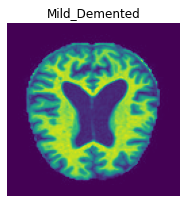

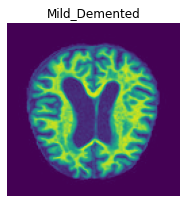

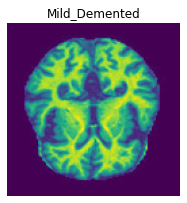

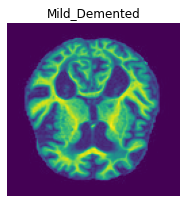

In [294]:
for i in range(4):
  plt.figure(figsize = (10, 7))
  plt.subplot(2, 2, i+1)
  view_random_image(base_folder = "output/train/", target_dir = "Mild_Demented")
  plt.plot()

In [295]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [313]:
# image_datagen = ImageDataGenerator(rescale = 1.0/255, 
#                                    horizontal_flip = True, 
#                                    vertical_flip = True, 
#                                    rotation_range = 2,
#                                    brightness_range = (2.0, 3.5), 
#                                    zoom_range = 0.4, 
#                                    validation_split = 0.3)

In [345]:
train_dir = "output/train"
val_dir = "output/val"
test_dir = "output/test"
img_size = (224, 224)

In [346]:
train_datagen = tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                                   image_size = img_size, 
                                                                   label_mode = "categorical", 
                                                                   batch_size = 32, 
                                                                   shuffle = True,
                                                                    seed = 42
                                                                  )

validation_datagen = tf.keras.preprocessing.image_dataset_from_directory(val_dir, 
                                                                         image_size = img_size, 
                                                                         label_mode = "categorical", 
                                                                         batch_size = 32, 
                                                                         shuffle= True, 
                                                                         seed = 42
                                                                         )

test_datagen = tf.keras.preprocessing.image_dataset_from_directory(test_dir, 
                                                                         image_size = img_size, 
                                                                         label_mode = "categorical", 

                                                                         )

Found 4479 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.
Found 642 files belonging to 4 classes.


In [347]:
train_datagen, test_datagen

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>)

In [348]:
train_datagen.class_names

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [349]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [350]:
# # Create input layer
# inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
# print(inputs.shape)

(None, 224, 224, 3)


In [351]:
# x = data_augmentation(inputs)

In [352]:
# # Give base_model inputs (after augmentation) and don't train it
# x = base_model(inputs)
# print(x.shape)

(None, 7, 7, 1280)


In [353]:
# # Pool output features of base model
# x = tf.keras.layers.MaxPool2D(name="global_average_pooling_layer")(x)
# print(x.shape)

(None, 3, 3, 1280)


In [354]:
# # Put a dense layer on as the output
# outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x)
# print(outputs.shape)

(None, 3, 3, 4)


In [355]:
# # Make a model with inputs and outputs
# model_1 = tf.keras.Model(inputs, outputs)


In [356]:
# # Compile the model
# model_1.compile(loss="categorical_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

In [357]:
# inputs.shape, outputs.shape

(TensorShape([None, 224, 224, 3]), TensorShape([None, 3, 3, 4]))

In [376]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
print(f"Input Shape: {inputs.shape}")

# Add in data augmentation Sequential model as a layer
# x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(inputs, training=False)
print(f"Base Model Shape{x.shape}")

# Pool output features of base model
x = tf.keras.layers.MaxPool2D(name="Max_pooling_layer")(x)
print(f"Pool layer1: {x.shape}")

# # Pool output features of base model
# x = tf.keras.layers.MaxPool2D(name="Max_pooling_layer2")(x)
# print(f"Pool layer2: {x.shape}")

# Pool output features of base model
x = tf.keras.layers.GlobalMaxPooling2D(name="global_average_pooling_layer")(x)
print(f"Pool layer3: {x.shape}")

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x)
print(outputs.shape)

# Make a model with inputs and outputs
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


Input Shape: (None, 224, 224, 3)
Base Model Shape(None, 7, 7, 1280)
Pool layer1: (None, 3, 3, 1280)
Pool layer3: (None, 1280)
(None, 4)


In [377]:
# Fit the model
history_1 = model_1.fit(train_datagen,
                    epochs=5,
                    steps_per_epoch=len(train_datagen),
                    validation_data=test_datagen,
                    validation_steps=len(test_datagen) # validate for less steps
                    )

Epoch 1/5
140/140 [==============================] - 18s 92ms/step - loss: 1.3390 - accuracy: 0.4769 - val_loss: 1.0414 - val_accuracy: 0.5202
Epoch 2/5
140/140 [==============================] - 12s 83ms/step - loss: 0.9508 - accuracy: 0.5769 - val_loss: 0.9857 - val_accuracy: 0.5919
Epoch 3/5
140/140 [==============================] - 12s 83ms/step - loss: 0.8363 - accuracy: 0.6175 - val_loss: 0.8942 - val_accuracy: 0.5919
Epoch 4/5
140/140 [==============================] - 12s 83ms/step - loss: 0.7830 - accuracy: 0.6452 - val_loss: 0.9813 - val_accuracy: 0.6153
Epoch 5/5
140/140 [==============================] - 12s 83ms/step - loss: 0.7149 - accuracy: 0.6798 - val_loss: 0.7864 - val_accuracy: 0.6449


In [390]:
model_2 = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(input_shape = img_size + (3,), filters = 10, kernel_size = 3, activation = "relu"), 
    
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = 2, padding = "valid"),

    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers. MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = "softmax")
                                        
                                    ])

In [391]:
model_2.compile(loss = ["categorical_crossentropy"], 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ["accuracy"])


# Fit the model
history_2 = model_2.fit(train_datagen,
                        epochs=5,
                        steps_per_epoch=len(train_datagen),
                        validation_data=validation_datagen,
                        validation_steps=len(validation_datagen))

Epoch 1/5
140/140 [==============================] - 10s 68ms/step - loss: 4.0020 - accuracy: 0.4823 - val_loss: 0.9660 - val_accuracy: 0.5309
Epoch 2/5
140/140 [==============================] - 10s 67ms/step - loss: 0.8722 - accuracy: 0.6088 - val_loss: 0.7738 - val_accuracy: 0.6568
Epoch 3/5
140/140 [==============================] - 10s 68ms/step - loss: 0.6488 - accuracy: 0.7214 - val_loss: 0.5790 - val_accuracy: 0.7498
Epoch 4/5
140/140 [==============================] - 10s 68ms/step - loss: 0.4245 - accuracy: 0.8332 - val_loss: 0.4640 - val_accuracy: 0.8038
Epoch 5/5
140/140 [==============================] - 10s 69ms/step - loss: 0.2686 - accuracy: 0.8995 - val_loss: 0.4200 - val_accuracy: 0.8421


In [392]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

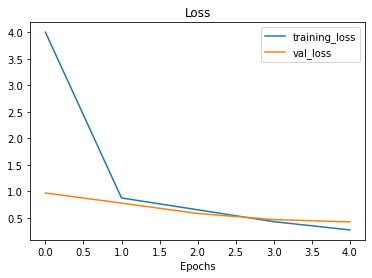

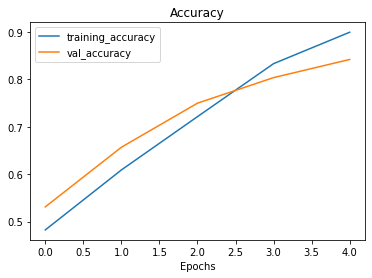

In [393]:
plot_loss_curves(history_2)

In [395]:
from tensorflow import keras

In [397]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [398]:
model.compile(loss = ["categorical_crossentropy"], 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ["accuracy"])


# Fit the model
history = model.fit(train_datagen,
                        epochs=5,
                        steps_per_epoch=len(train_datagen),
                        validation_data=validation_datagen,
                        validation_steps=len(validation_datagen))

Epoch 1/5
140/140 [==============================] - 9s 52ms/step - loss: 1.1365 - accuracy: 0.5113 - val_loss: 0.9590 - val_accuracy: 0.5762
Epoch 2/5
140/140 [==============================] - 7s 48ms/step - loss: 0.8588 - accuracy: 0.6091 - val_loss: 0.7986 - val_accuracy: 0.6763
Epoch 3/5
140/140 [==============================] - 7s 49ms/step - loss: 0.6781 - accuracy: 0.7069 - val_loss: 0.5777 - val_accuracy: 0.7842
Epoch 4/5
140/140 [==============================] - 7s 49ms/step - loss: 0.4994 - accuracy: 0.7933 - val_loss: 0.3911 - val_accuracy: 0.8632
Epoch 5/5
140/140 [==============================] - 7s 49ms/step - loss: 0.3680 - accuracy: 0.8486 - val_loss: 0.4650 - val_accuracy: 0.8163
